In [1]:
from ms_benchmark import predict_utils, calibration_utils

from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, brier_score_loss
from sklearn.calibration import calibration_curve
import copy

from ms_benchmark import DATA_DIR
from model_wrapper import BNNMSModel, DynamicMSModel, StaticMSModel, RNNMSModel, AttentionMSModel

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
config = {
    #"Dynamic Baseline" : DynamicMSModel("s2rpzi9y"),
    #"Static Baseline" : StaticMSModel("fiv4p5xe"),
    #"Bayesian NN": BNNMSModel(),
    #"RNN": RNNMSModel("gfbjt65v"),
    "Attention": AttentionMSModel("a9zakq0n"),
}

In [3]:
results = {}
for key, ms_model in config.items():
    y_true_list = []
    y_calibrated_list = []
    
    for fold in range(5):
        ms_model.load_model_and_data(fold)
        
        y_true_test, y_pred_test = ms_model.predict_on_test()
        y_true_val, y_pred_val = ms_model.predict_on_val()
        
        calibration_dict = calibration_utils.calibration(y_pred_val, y_true_val, y_pred_test, y_true_test)        
        y_true,_,y_calibrated = calibration_dict["platt"]
        
        y_true_list.append(y_true)
        y_calibrated_list.append(y_calibrated)
    
    y_true_full = np.concatenate(y_true_list)
    y_calibrated_full = np.concatenate(y_calibrated_list)
    df = pd.DataFrame()
    df["y_true"] = y_true_full
    df["y_calibrated"] = y_calibrated_full
    results[key] = df

/home/edward/.cache/pypoetry/virtualenvs/ms-benchmark-K_Ybk8KV-py3.8/lib/python3.8/site-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `Accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.classification.accuracy.Accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

/home/edward/.cache/pypoetry/virtualenvs/ms-benchmark-K_Ybk8KV-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/edward/.cache/pypoetry/virtualenvs/ms-benchmark-K_Ybk8KV-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


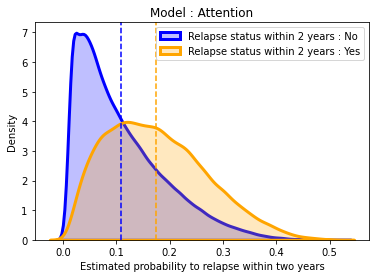

In [4]:
import seaborn as sns
labels = ["Relapse status within 2 years : No", "Relapse status within 2 years : Yes"]
colors = ["blue","orange"]

for key in results.keys():
    plt.figure()
    for label in [0,1]:
        df = results[key]
        df_sub = df.loc[df.y_true==label]
        sns.distplot(df_sub['y_calibrated'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = labels[label], color = colors[label])
        plt.axvline(df_sub["y_calibrated"].mean(),linestyle = "--", color = colors[label])
    plt.legend()
    plt.title(f"Model : {key}")
    plt.xlabel("Estimated probability to relapse within two years")
    plt.savefig(f"./plots/distribution_{key}.pdf")
    plt.show()
    